# Homework #3



## Question #1

For this question you will use [Olivetti Face Dataset](https://scikit-learn.org/0.19/datasets/olivetti_faces.html).

### Part 1

1. Split your dataset as train and test subset. But make sure that each test set contains exactly one random image from each distinct individual. This means, you will have to write your own train_test_split function for this dataset.

2. Construct an SVM model on your train set, and test its accuracy on your test set. For this part, the images viewed as integer vectors of length 4096 are independent variables while the id number of the person that picture belongs to is the dependent variable. In other words, you are trying to construct an SVM model that recognizes individuals based on their pictures.

3. Repeat Step 2 ten times.

4. Calculate the mean accuracy and get 95% confidence interval using the t-test.

### Part 2

Do the same things you did in Part 1 but with a multinomial regression model.

In [15]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import t
from sklearn.linear_model import LogisticRegression

In [16]:
#Part 1.1

faces = fetch_olivetti_faces()
x_test = []
y_test = []
x_train = []
y_train = []

fn = np.vectorize(lambda x: not x)

for i in range(40):
    y_test.append(i)
    individual = faces.data[faces.target==i]
    rand = np.random.randint(10)
    x_test.append(individual[rand])
    for j in range(10):
        if j != rand:
            y_train.append(i)
            x_train.append(individual[j])


In [17]:
#Part 1.2
        
model = LinearSVC(max_iter=50)
model.fit(x_train,y_train)
predicted = model.predict(x_test)
print(accuracy_score(predicted,y_test))



0.975


/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [18]:
#Part 1.3&4

accuracy_scores = []

for i in range(10):
    model.fit(x_train,y_train)
    predicted = model.predict(x_test)
    accuracy_scores.append(accuracy_score(predicted,y_test)) 

avg_accuracy_score = sum(accuracy_scores)/len(accuracy_scores)

m = np.mean(accuracy_scores)
dev = np.std(accuracy_scores)
confidence_interval = t.interval(0.95, 9, loc=m, scale=dev)

print(avg_accuracy_score)
print(confidence_interval)

/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.p

0.9674999999999999
(0.9166014638383276, 1.0183985361616723)


/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [19]:
#Part 2

model_2 = LogisticRegression(multi_class='multinomial',max_iter=10,solver='saga')
model_2.fit(x_train,y_train)
predicted_2 = model_2.predict(x_test)
print(accuracy_score(predicted_2,y_test))

accuracy_scores_2 = []

for i in range(10):
    model_2.fit(x_train,y_train)
    predicted_2 = model_2.predict(x_test)
    accuracy_scores_2.append(accuracy_score(predicted_2,y_test)) 

avg_accuracy_score_2 = sum(accuracy_scores_2)/len(accuracy_scores_2)

m_2 = np.mean(accuracy_scores_2)
dev_2 = np.std(accuracy_scores_2)
confidence_interval_2 = t.interval(0.95, 9, loc=m_2, scale=dev_2)

print(avg_accuracy_score_2)
print(confidence_interval_2)

/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.8


/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages

0.7975000000000001
(0.7505227783257618, 0.8444772216742384)


/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


## Question #2

For this question you will use [Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/).

### Part 1

Convert the dataset into numerical data using [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) from SciKitLearn's `sklearn.feature_extraction.text` module. Make sure that you also record whether a given movie review is positive or negative or neutral. Calling on `CountVectorizer` on individual entries is not going to be enough. You will have to do some preliminary work. Read the documentation carefully.

### Part 2

Using the numerical data you constructed in Part 1, construct an LDA model to see if data projects into a 2D space with clear separation. Analyze your result.


### Part 3

Using the numerical data you constructed in Part 1, 

1. Split the data as train and test using SciKitLearn's `train_test_split` function.
2. Form a multiclass SVM model on the train set and test its accuracy.
3. Repeat a small number of times and get mean accuracy and its error band.

### Part 4

Repeat Part 3 using multinomial regression models instead of SVM.

### Part 5

Using the numerical data you constructed in Part 1, 

1. Construct an PCA model and look at the eigenvalues from largest to smallest. 
2. How many dimensions needed to capture 90% of the variation of the data? (Read the documentation of [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) form SciKitLearn)
3. Transform your data using the result you obtained in Step 2.
4. Construct an SVM model on the new dataset you constructed and cross-validate it.
5. Compare your result with the result you obtained in Part 3.


In [20]:
#QUESTION 2 - libraries
import os
from sklearn.feature_extraction.text import CountVectorizer
from random import sample
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.sparse import csr_matrix as csr
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error
from scipy.stats import t
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

**#Part 1 - get data and vectorize**
In the first part, I will read the data and then vectorize the text data. Because the vectorized data is stored as csr sparse matrix format, I will convert it to array format. 

In [21]:
test_neg = os.listdir("aclImdb/test/neg")
test_pos = os.listdir("aclImdb/test/pos")
train_neg = os.listdir("aclImdb/train/neg")
train_pos = os.listdir("aclImdb/train/pos")

xs = []
ys = []
    
for i in range(len(train_neg)):
    b = "/Users/burak.cakan/Desktop/aclImdb/train/neg/"+train_neg[i]
    f = open(b, "r")
    xs.append(f.read())
    ys.append(0)
    
for i in range(len(train_pos)):
    b = "/Users/burak.cakan/Desktop/aclImdb/train/pos/"+train_pos[i]
    f = open(b, "r")
    xs.append(f.read())
    ys.append(1)

for i in range(len(test_neg)):
    b = "/Users/burak.cakan/Desktop/aclImdb/test/neg/"+test_neg[i]
    f = open(b, "r")
    xs.append(f.read())
    ys.append(0)

for i in range(len(test_pos)):
    b = "/Users/burak.cakan/Desktop/aclImdb/test/pos/"+test_pos[i]
    f = open(b, "r")
    xs.append(f.read())
    ys.append(1)
    
cv = CountVectorizer()
count_vector = cv.fit_transform(xs)

xn = []
xp = []
c = count_vector.toarray()

for i in range(len(xs)):
    if ys[i] == 0:
        xn.append(c[i])
    else:
        xp.append(c[i])
        

**#Part 2 - LDA**
In some computations like LDA and PCA for this homework, size of the data could be a problem. I will use the sample from whole population in case of encountering memory error. To do this, there are some statistical formulas to find the best sample size for 95% confidence interval. I used this approach with the help of a calculator. (https://www.calculator.net/sample-size-calculator.html?type=1&cl=95&ci=5&pp=50&ps=50000&x=76&y=8)
The result from this calculator was 379 but I wanted to work with a bigger sample to minimize the information loss. Thus, I chose the sample size as 500.

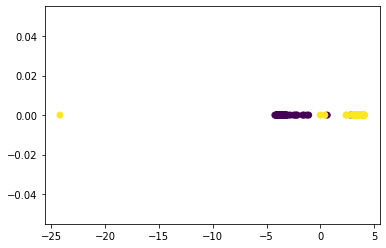

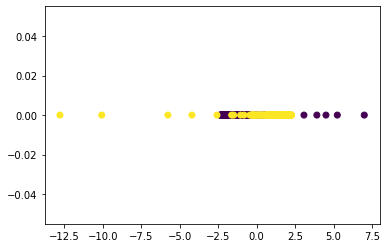

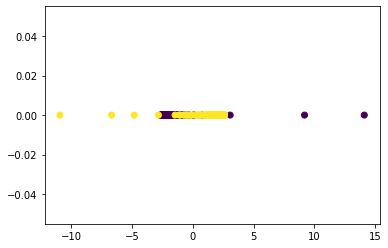

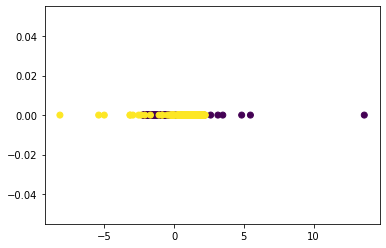

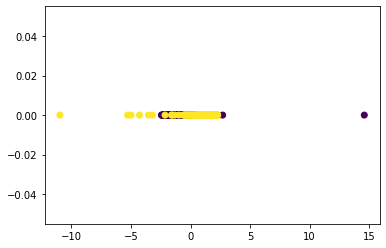

In [22]:
#sample size 379 --> 500
for i in range(5): 
    xns = sample(xn,500)
    xps = sample(xp,500)

    x = xns + xps
    y = [0]*500 + [1]*500

    model = LinearDiscriminantAnalysis()
    transformed = model.fit_transform(x,y)
    plt.figure()
    plt.scatter(transformed[:,0],np.zeros(len(transformed)),c=y)
plt.show()

#Part 2 - Analysis on LDA:
Accarding to plots of different samples shown above, it is hard to say that there is a clear separation after LDA implementation to the data. One of the cause of this could be very high dimensionality (more than 100.000 attributes) in the dataset.

#Part 3 - SVM Implementation
To use full data without error, I started this notebook with this command: 
terminal>> jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
Thus, I used full dateset in part 3 and 4.

In step 2 of part 3, I will try both cramer_singer and ovl method of svm multi class classification. Then I will choose best one in accuracy for the other step.

In step 3, I will calculate error band like calculating 95% confidence interval of mean. More basically, I will find average of error for 10 iterations. Then, I will calculate standart deviation of error values. At the end, the formula of confidence interval is implemented (x̄ ± z*σ/(√n)) and this will represent my error band.

In [23]:
#Part 3.1 - train/test split
x_train, x_test, y_train, y_test = train_test_split(c,ys,test_size=0.2)

In [24]:
#Part 3.2 
def svcMulti(class_type):
    model = LinearSVC(multi_class=class_type)
    model.fit(x_train,y_train)
    predicted = model.predict(x_test)
    return accuracy_score(predicted,y_test)
a=svcMulti('crammer_singer')
b=svcMulti('ovr')
print('Accuracy with cramer_singer:', a)
print('Accuracy with ovr:', b)

/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy with cramer_singer: 0.8687
Accuracy with ovr: 0.8726


Because ovr is a little bit better than cramer_singer, I go on with ovr in the following section:

In [25]:
#Part3.3 
accuracy_scores = []
mean_absolute_errors = []

for i in range(5):
    bb=svcMulti('ovr')
    accuracy_scores.append(bb) 
    mean_absolute_errors.append(1-bb)

avg_accuracy_score = sum(accuracy_scores)/len(accuracy_scores)
avg_mean_abs_error = sum(mean_absolute_errors)/len(mean_absolute_errors)

stdev_error = np.std(mean_absolute_errors)
error_interval = t.interval(0.95, 9, loc=avg_accuracy_score, scale=stdev_error)

print('Average accuracy score:',avg_accuracy_score)
print('Average mean absolute error:',avg_mean_abs_error)
print('Avg. Std of errors:',stdev_error)
print('Error Band:',error_interval)

/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.p

Average accuracy score: 0.8726800000000001
Average mean absolute error: 0.12731999999999996
Avg. Std of errors: 9.797958971131634e-05
Error Band: (0.8724583547693322, 0.872901645230668)


#Part 4
In this part, I will do the same steps in the previous step but I will use regression instead of svm.

In [ ]:
#Part 4

model_2 = LogisticRegression(multi_class='multinomial',max_iter=10,solver='saga')
model_2.fit(x_train,y_train)
predicted_2 = model_2.predict(x_test)
print(accuracy_score(predicted_2,y_test))

accuracy_scores_2 = []
mean_absolute_errors_2 = []

for i in range(5):
    model_2.fit(x_train,y_train)
    predicted_2 = model_2.predict(x_test)
    accuracy_scores_2.append(accuracy_score(predicted_2,y_test)) 
    mean_absolute_errors_2.append(mean_absolute_error(y_test,predicted))

m_2 = np.mean(accuracy_scores_2)

stdev_error_2 = np.std(mean_absolute_errors_2)
error_interval_2 = t.interval(0.95, 9, loc=m_2, scale=stdev_error_2)


print(m_2)
print(stdev_error)
print(error_interval_2)


Because all error values are the same, the standart deviation of error is about zero. That's why, error band is printed as "nan". Error band could be [0.1383,0.1383].

In [ ]:
#Part 4 (extended)
print(mean_absolute_errors_2)


Part 5 - PCA

5.1 - In the first part, I will find eigenvalues by using the explained_variance_ component.

In [ ]:
#5.1

xns = sample(xn,500)
xps = sample(xp,500)

x = xns + xps
y = [0]*500 + [1]*500


model = PCA()
model.fit(x) 

print(model.explained_variance_) #eigenvalues


#Part 5.2
I found the number of attributes that covers the 90% of the variation in two ways:

In [ ]:
#5.2
count = 0
vr = 0
i = 0
a=model.explained_variance_ratio_

while vr < 0.9:
    vr += a[i]
    count += 1
    i += 1

print(count)


In [ ]:
pca = PCA(0.9)
pca.fit(x)
pca.n_components_

In [ ]:
pca = PCA(0.9)
transformed = pca.fit_transform(x)


In [ ]:
plt.scatter(transformed[:,0],np.zeros(len(transformed)),c=y)
#plt.scatter(transformed[:,0],np.zeros(len(transformed)),c=y)


In [ ]:
# Part 5.4 with 10 different samples: 
mean_acc = []
for i in range(10):
    xns = sample(xn,500)
    xps = sample(xp,500)

    x = xns + xps
    y = [0]*500 + [1]*500
    
    pca = PCA(0.9)
    pca.fit(x)
    transformed = pca.fit_transform(x)
    clf = LinearSVC()
    scores = cross_val_score(clf, transformed, y, cv=10)
    n = np.mean(scores)
    mean_acc.append(n)
    
average_acc = sum(mean_acc)/len(mean_acc)
print(average_acc)

    

#Part 5.5
In the mean of compating with part 2, according to scatter plots of LDA and PCA just above, LDA had a better performance for separating but both of them cannot give a clear separation.
In the mean of compating with part 3, mean accuracy score is about 0.86. In PCA, we have using the model with less dimensions. Thus, we have sacrificed some of accuracy. And after dimentionality reduction in pca, my accuracy value is 0.736.